# Day_080

### 練習時間
#### 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
#### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.models import Model, Sequential

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128]):
    input_layer =Input(input_shape[1:])
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(input_layer)
        else:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(x)
    
    out = Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model  

In [6]:
# 超參數設定
LEARNING_RATE = [0.01, 0.001, 0.0001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
from keras import optimizers
results = {}
Opts= ['SGD', 'RMSprop', 'AdaGrad', 'Adam']

for lr in LEARNING_RATE:
    for opt in Opts:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'Current opt= {opt}, lr= {lr}\n')
        
        model = build_mlp(input_shape=x_train.shape)
        model.summary()
        if opt == 'SGD' :
            optimizer = optimizers.SGD(lr = lr, nesterov = True, momentum = MOMENTUM)
        elif opt == 'RMSprop': 
            optimizer = optimizers.RMSprop(lr = lr, rho=0.9, epsilon = None, decay = 0.0)
        elif opt == 'AdaGrad':
            optimizer = optimizers.Adagrad(lr = lr, epsilon = None, decay = 0.0)
        elif opt == 'Adam':
            optimizer = optimizers.Adam(lr = lr, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad = False)
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer )

        model.fit(x_train, y_train, 
              epochs = EPOCHS, 
              batch_size = BATCH_SIZE, 
              validation_data = (x_test, y_test), 
              shuffle = True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "ex- %s" % str(opt)+str('+')+str(lr)
    
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Current opt= SGD, lr= 0.01

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 355us/step - loss: 14.4445 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 18s 351us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 18s 350us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 18s 351us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 17s 349us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 17s 349us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 18s 354us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 17s 341us/step - loss: 14.4208 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 17s 336us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 17s 334us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 17s 337us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 17s 337us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 17s 333us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 17s 334us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 19s 378us/step - loss: 14.4389 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 18s 368us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 18s 369us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 19s 371us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 18s 369us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 19s 371us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 18s 368us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 27s 535us/step - loss: 2.0422 - acc: 0.2719 - val_loss: 1.8664 - val_acc: 0.3394
Epoch 2/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.8072 - acc: 0.3649 - val_loss: 1.7538 - val_acc: 0.3867
Epoch 3/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.7236 - acc: 0.3946 - val_loss: 1.6917 - val_acc: 0.4104
Epoch 4/50
50000/50000 [==============================] - 26s 524us/step - loss: 1.6689 - acc: 0.4142 - val_loss: 1.6493 - val_acc: 0.4186
Epoch 5/50
50000/50000 [==============================] - 26s 519us/step - loss: 1.6247 - acc: 0.4307 - val_loss: 1.6144 - val_acc: 0.4320
Epoch 6/50
50000/50000 [==============================] - 26s 522us/step - loss: 1.5864 - acc: 0.4439 - val_loss: 1.5889 - val_acc: 0.4407
Epoch 7/50
50000/50000 [==============================] - 26s 525us/step - loss: 1.5535 - acc: 0.4541 - val_loss: 1.5547 - val_acc: 0.4499
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 28s 560us/step - loss: 1.8773 - acc: 0.3216 - val_loss: 1.7955 - val_acc: 0.3408
Epoch 3/50
50000/50000 [==============================] - 28s 556us/step - loss: 1.7757 - acc: 0.3609 - val_loss: 1.7781 - val_acc: 0.3669
Epoch 4/50
50000/50000 [==============================] - 28s 555us/step - loss: 1.7025 - acc: 0.3883 - val_loss: 1.8003 - val_acc: 0.3639
Epoch 5/50
50000/50000 [==============================] - 28s 559us/step - loss: 1.6489 - acc: 0.4110 - val_loss: 1.7705 - val_acc: 0.3523
Epoch 6/50
50000/50000 [==============================] - 28s 560us/step - loss: 1.6037 - acc: 0.4287 - val_loss: 1.7222 - val_acc: 0.3984
Epoch 7/50
50000/50000 [==============================] - 28s 557us/step - loss: 1.5637 - acc: 0.4404 - val_loss: 1.7254 - val_acc: 0.3944
Epoch 8/50
50000/50000 [==============================] - 28s 556us/step - loss: 1.5285 - acc: 0.4545 - val_loss: 1.6128 - val_acc: 0.4187
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 17s 347us/step - loss: 1.7180 - acc: 0.3972 - val_loss: 1.6988 - val_acc: 0.3887
Epoch 4/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.6698 - acc: 0.4127 - val_loss: 1.6903 - val_acc: 0.3987
Epoch 5/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.6359 - acc: 0.4250 - val_loss: 1.6573 - val_acc: 0.4118
Epoch 6/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.6075 - acc: 0.4345 - val_loss: 1.6393 - val_acc: 0.4193
Epoch 7/50
50000/50000 [==============================] - 21s 412us/step - loss: 1.5840 - acc: 0.4460 - val_loss: 1.5959 - val_acc: 0.4390
Epoch 8/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.5628 - acc: 0.4523 - val_loss: 1.5865 - val_acc: 0.4439
Epoch 9/50
50000/50000 [==============================] - 20s 395us/step - loss: 1.5467 - acc: 0.4582 - val_loss: 1.5868 - val_acc: 0.4401
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.5633 - acc: 0.4451 - val_loss: 1.5397 - val_acc: 0.4433
Epoch 5/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.5038 - acc: 0.4646 - val_loss: 1.5151 - val_acc: 0.4539
Epoch 6/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.4578 - acc: 0.4796 - val_loss: 1.5686 - val_acc: 0.4449
Epoch 7/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.4346 - acc: 0.4872 - val_loss: 1.4538 - val_acc: 0.4837
Epoch 8/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.3991 - acc: 0.5024 - val_loss: 1.4129 - val_acc: 0.4937
Epoch 9/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.3660 - acc: 0.5132 - val_loss: 1.4391 - val_acc: 0.4810
Epoch 10/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.3404 - acc: 0.5251 - val_loss: 1.4123 - val_acc: 0.4957
Epoch 11/50
50000/50000 [=

Epoch 5/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.9342 - acc: 0.3237 - val_loss: 1.9196 - val_acc: 0.3305
Epoch 6/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.9046 - acc: 0.3362 - val_loss: 1.8933 - val_acc: 0.3389
Epoch 7/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.8811 - acc: 0.3453 - val_loss: 1.8718 - val_acc: 0.3453
Epoch 8/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.8606 - acc: 0.3540 - val_loss: 1.8521 - val_acc: 0.3550
Epoch 9/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.8425 - acc: 0.3589 - val_loss: 1.8355 - val_acc: 0.3614
Epoch 10/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.8264 - acc: 0.3663 - val_loss: 1.8192 - val_acc: 0.3702
Epoch 11/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.8121 - acc: 0.3712 - val_loss: 1.8058 - val_acc: 0.3706
Epoch 12/50
50000/50000 [

Epoch 6/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.5777 - acc: 0.4432 - val_loss: 1.6321 - val_acc: 0.4216
Epoch 7/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.5435 - acc: 0.4584 - val_loss: 1.6480 - val_acc: 0.4119
Epoch 8/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.5181 - acc: 0.4662 - val_loss: 1.5615 - val_acc: 0.4368
Epoch 9/50
50000/50000 [==============================] - 20s 405us/step - loss: 1.4899 - acc: 0.4767 - val_loss: 1.5864 - val_acc: 0.4422
Epoch 10/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.4697 - acc: 0.4813 - val_loss: 1.4679 - val_acc: 0.4836
Epoch 11/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.4426 - acc: 0.4943 - val_loss: 1.5754 - val_acc: 0.4472
Epoch 12/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.4238 - acc: 0.4977 - val_loss: 1.5182 - val_acc: 0.4546
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 18s 355us/step - loss: 1.8038 - acc: 0.3731 - val_loss: 1.8025 - val_acc: 0.3668
Epoch 8/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.7938 - acc: 0.3765 - val_loss: 1.7924 - val_acc: 0.3717
Epoch 9/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.7846 - acc: 0.3805 - val_loss: 1.7842 - val_acc: 0.3749
Epoch 10/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.7765 - acc: 0.3827 - val_loss: 1.7774 - val_acc: 0.3781
Epoch 11/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.7689 - acc: 0.3859 - val_loss: 1.7711 - val_acc: 0.3798
Epoch 12/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.7619 - acc: 0.3887 - val_loss: 1.7642 - val_acc: 0.3827
Epoch 13/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.7554 - acc: 0.3909 - val_loss: 1.7578 - val_acc: 0.3856
Epoch 14/50
50000/50000

Epoch 8/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.4391 - acc: 0.4950 - val_loss: 1.4682 - val_acc: 0.4751
Epoch 9/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.4125 - acc: 0.5040 - val_loss: 1.4703 - val_acc: 0.4787
Epoch 10/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.3884 - acc: 0.5123 - val_loss: 1.4430 - val_acc: 0.4849
Epoch 11/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.3667 - acc: 0.5173 - val_loss: 1.4240 - val_acc: 0.4925
Epoch 12/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.3414 - acc: 0.5280 - val_loss: 1.3983 - val_acc: 0.5008
Epoch 13/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.3173 - acc: 0.5364 - val_loss: 1.3967 - val_acc: 0.5062
Epoch 14/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.3033 - acc: 0.5412 - val_loss: 1.3844 - val_acc: 0.5079
Epoch 15/50
50000/5000

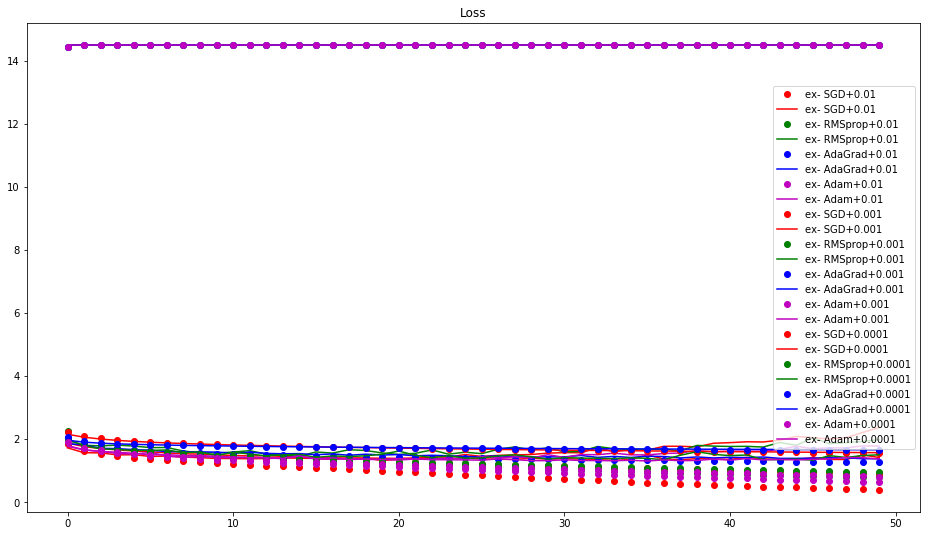

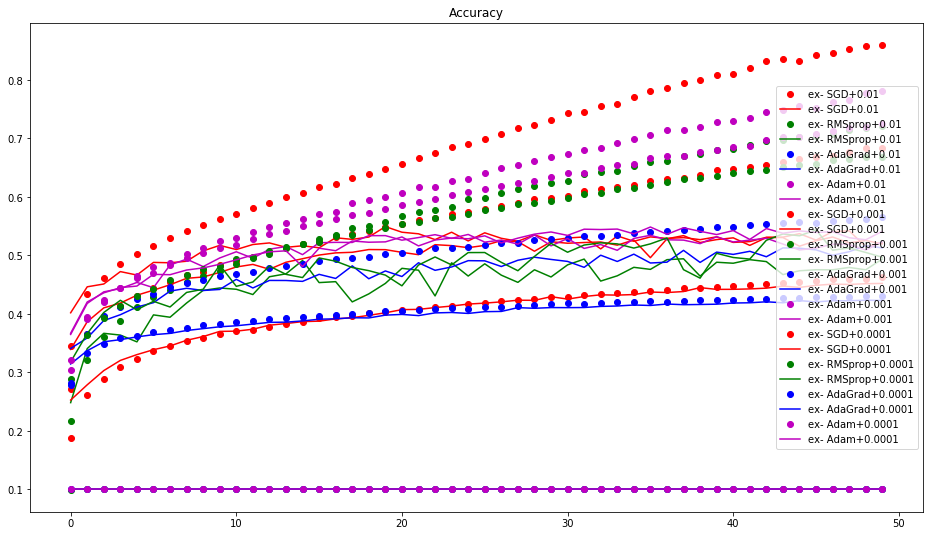

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "m"]

plt.figure(figsize=(16, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], 'o', label = cond, color = color_bar[i%4])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '-', label = cond, color = color_bar[i%4])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], 'o', label = cond, color = color_bar[i%4])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '-', label=cond, color=color_bar[i%4])
    plt.title("Accuracy")   
plt.legend()
plt.show()